In [1]:
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
#matplotlib.rc('font', **font)
cstring = 'rgbcmyk'
import matplotlib as ml
%matplotlib inline
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (8.0, 5.0)
ml.rcParams['text.usetex'] =True
ml.rc('font', family='serif',size=20)

In [2]:
g0 = 3100
g1 = 380
g3 = 290
g4 = 141
g2 = -15
g5 = 50
Dt2 = -2.3
Dtp = 10.5

In [3]:
pauli0=np.eye(2)
pauli1=np.array([[0,1],[1,0]])
pauli2=np.array([[0,-1j],[1j,0]])
pauli3=np.array([[1,0],[0,-1]])

def getBMatrixABC(kx, ky, Dt, Phi, ang, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    p = xi * kx + ky * 1j
    pc = xi * kx - ky * 1j
    idt = np.ones(kx.shape, dtype=float)
    iB = 2*np.pi*Phi*1j*np.exp(-xi*ang*1j)
    iBc = np.conj(iB)
    Hl = np.array([[(Dt + Dt2 - mu)*idt, v0*(pc+iB), -v4*(pc+0.5*iB), -v3*(p+0.5*iBc), 0*idt, 0.5*g2*idt],
                   [v0*(p+iBc), (Dt + Dt2 + Dtp - mu)*idt, g1*idt, -v4*(pc+0.5*iB), 0*idt, 0*idt],
                   [-v4*(p+0.5*iBc), g1*idt, (-2*Dt2 + Dtp - mu)*idt, v0*pc, -v4*(pc-0.5*iB), -v3*(p-0.5*iBc)],
                   [-v3*(pc+0.5*iB), -v4 * (p+0.5*iBc), v0*p, (-2*Dt2 + Dtp - mu)*idt, g1*idt, -v4*(pc-0.5*iB)],
                   [0*idt, 0*idt, -v4*(p-0.5*iBc), g1*idt,(Dt2 - Dt + Dtp - mu)*idt, v0*(pc-iB)],
                   [0.5*g2*idt, 0*idt, -v3*(pc-0.5*iB), -v4*(p-0.5*iBc), v0*(p-iBc), (Dt2 - Dt - mu)*idt]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

def getBMatrixABC2(kx, ky, Dt,  Phi, ang, mu, xi):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    kx, ky = np.asarray(kx), np.asarray(ky)
    zr = np.zeros(kx.shape)
    mat1=np.moveaxis(np.array([[zr,(xi*kx-ky*1j)**3],[(xi*kx+ky*1j)**3,zr]]),[0,1], [-2,-1])
    kx=kx[...,np.newaxis,np.newaxis]
    ky=ky[...,np.newaxis,np.newaxis]
    ksq = kx**2+ky**2
    return ((Dtp*v0**2*ksq/g1**2+Dt2*(1-3*v0**2*ksq/g1**2)+(2*v0*v4*ksq/g1))*pauli0+
            Dt*(1-v0**2*ksq/g1**2)*pauli3+(2*v0**3*v4*kx**4/g1**3)*pauli0+
            (v0**3/g1**2)*mat1+((g2/2)+(2*v0*v3/g1)*ksq)*pauli1-
           (-(6*np.pi*Phi*v0*v4)/g1+(4*np.pi*Phi*v0**2)*(-Dtp+3*Dt2)/g1**2)*(kx*np.sin(ang)-ky*np.cos(ang))*pauli3-
            ((4*np.pi*Phi*v0**2*Dt)/g1**2)*(kx*np.sin(ang)-ky*np.cos(ang))*pauli0)

In [27]:
kr = np.linspace(-0.15,0.15, 800)
Dl=20
KX, KY = np.meshgrid(kr, kr)
w0, v0 = np.linalg.eigh(getBMatrixABC(KX, KY, Dl, 0.00, np.pi/2, 0.0, 1))
w, v = np.linalg.eigh(getBMatrixABC2(KX, KY, Dl, 0.00, np.pi/2, 0.0, 1))

[None, None]

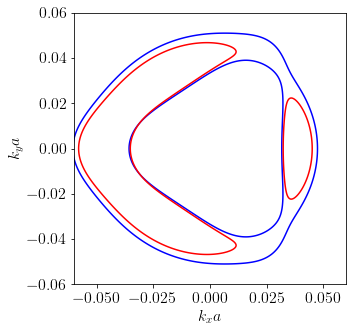

In [126]:
ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['contour.negative_linestyle']= 'solid'
mul=19.1
fig, ax= plt.subplots(1,1)
ax.contour(KX, KY, -w0[:,:,2],[mul],colors='b')
ax.contour(KX, KY, -w[:,:,0],[mul],colors='r')
ax.set_xlim([-0.06,0.06])
ax.set_ylim([-0.06,0.06])
ax.set_xlabel(r'$k_xa$')
ax.set_ylabel(r'$k_ya$')
ax.set(adjustable='box', aspect='equal')

In [38]:
Dl=20
kx=np.linspace(-0.1,0.1,200)
ky=np.zeros(kx.shape)
#w0,v0=np.linalg.eigh(getBMatrixABC2(kx, ky, Dl, 0.002, np.pi/2, 0.0, 1))
w,v=np.linalg.eigh(getBMatrixABC(kx, ky, Dl, 0.000, np.pi/2, 0.0, 1))

In [144]:
def shift(kx, ky, Dt, Phi, ang):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    return (-4*np.pi*Dt*(v0**2/g1**2+(1/np.sqrt(g2**2+4*Dt**2))*(-(3*v0*v4/g1)+(2*v0**2/g1**2)*(-Dtp+3*Dt2)))*
            Phi*(-np.cos(ang)*ky+np.sin(ang)*kx),(-4*np.pi*Dt*(v0**2/g1**2-(1/np.sqrt(g2**2+4*Dt**2))*(-(3*v0*v4/g1)+(2*v0**2/g1**2)*(-Dtp+3*Dt2)))*
            Phi*(-np.cos(ang)*ky+np.sin(ang)*kx)))

In [148]:
sf= shift(kx, ky, Dl, 0.002, np.pi/2)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


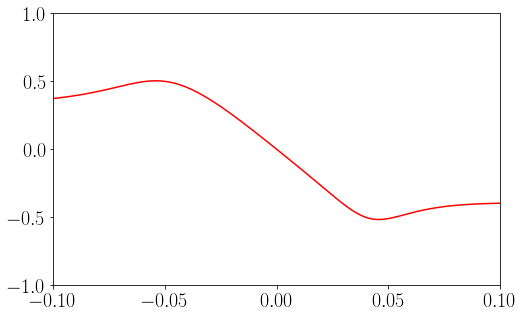

In [47]:
ml.rcParams['figure.figsize'] = (8.0, 5.0)
#plt.plot(kx,w0,'b')
plt.plot(kx, np.einsum('ik, kl, il->i', np.conj(v[:,:,2]), gy, v[:,:,2]),'r')
plt.ylim([-1,1])
plt.xlim([-0.1,0.1])
plt.show()

In [4]:
mult=2*9.1*2.46*3.34*1.6*1e-5/1.05**2

def gABC(xi,xy):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    if xy:
        iB = mult*1j
    else:
        iB=mult*xi
    iBc = np.conj(iB)
    Hl = np.array([[0, v0*iB, -v4*0.5*iB, -v3*0.5*iBc, 0, 0],
                   [v0*iBc, 0, 0, -v4*0.5*iB, 0, 0],
                   [-v4*0.5*iBc, 0, 0, 0, v4*0.5*iB, v3*0.5*iBc],
                   [-v3*0.5*iB, -v4*0.5*iBc, 0, 0, 0, v4*0.5*iB],
                   [0, 0, v4*0.5*iBc, 0,0, -v0*iB],
                   [0, 0, v3*0.5*iB, v4*0.5*iBc, -v0*iBc, 0]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

def v(xi,xy):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    if xy:
        p = xi
        pc = xi
    else:
        p = 1j
        pc = -1j
    Hl = np.array([[0, v0*pc, -v4*pc, -v3*p, 0, 0],
                   [v0*p, 0, 0, -v4*pc, 0, 0],
                   [-v4*p, 0, 0, v0*pc, -v4*pc, -v3*p],
                   [-v3*pc, -v4*p, v0*p, 0, 0, -v4*pc],
                   [0, 0, -v4*p, 0, 0, v0*pc],
                   [0, 0, -v3*pc, -v4*p, v0*p, 0]])
    return np.moveaxis(Hl, [0,1], [-2,-1])

In [5]:
gx=gABC(1,True)
gy=gABC(1,False)
vx=v(1,True)
vy=v(1,False) 

In [28]:
gxMh = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,2]), gx, v0[:,:,:,2])
gyMh = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,2]), gy, v0[:,:,:,2])
gxMe = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,3]), gx, v0[:,:,:,3])
gyMe = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,3]), gy, v0[:,:,:,3])

vxh = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,2]), vx, v0[:,:,:,2])
vyh = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,2]), vy, v0[:,:,:,2])
vxe = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,3]), vx, v0[:,:,:,3])
vye = np.einsum('ijk, kl, ijl->ij', np.conj(v0[:,:,:,3]), vy, v0[:,:,:,3])

In [57]:
def anal(kx, ky, Dt):
    v0 = 0.5 * np.sqrt(3) * g0
    v3 = 0.5 * np.sqrt(3) * g3
    v4 = 0.5 * np.sqrt(3) * g4
    return -2*mult*Dt*(v0**2/g1**2-(1/np.sqrt(g2**2+4*Dt**2))*(-(3*v0*v4/g1)+(2*v0**2/g1**2)*(-Dtp+3*Dt2)))*np.array([-ky,kx])

In [58]:
gxMa,gyMa=anal(KX,KY,Dl)

In [6]:
dpath = "/home/aghazary/Documents/StonerABCData/"
dmu = 0.002
mulABC = np.arange(-150,150.0001,dmu)
DlistABC = np.arange(0,120.1,0.5)
with open(dpath+'U0.0KV0.0KDataABCGraphene.npy', 'rb') as f:
    a4ABC = np.load(f)
mulABC = mulABC[1:-1]
nuTABC = a4ABC[:,1:-1]
dosABC = (a4ABC[:,2:]-a4ABC[:,0:-2]) / (2*dmu)
fend = np.array([interp1d(nuTABC[i], mulABC, kind='linear') for i in range(len(nuTABC))])

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of th

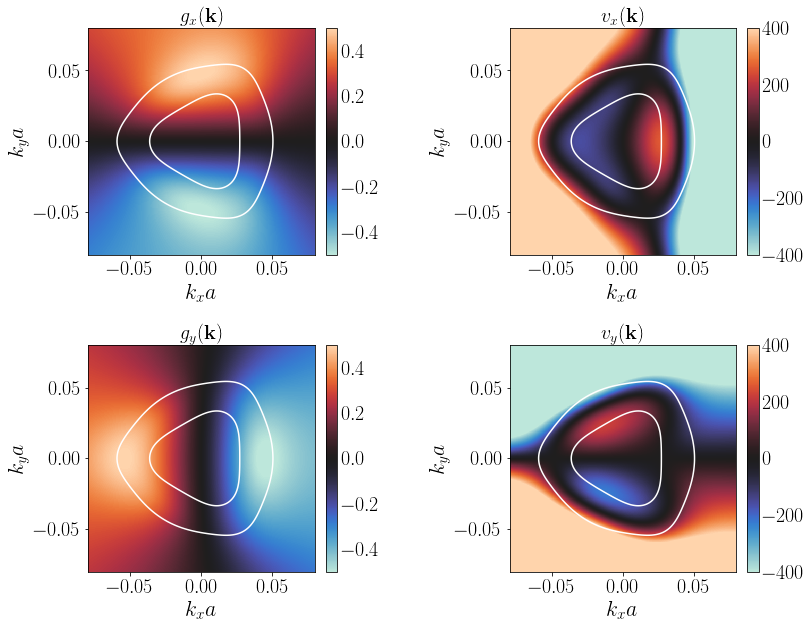

In [49]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ml.rc('font', family='serif',size=20)
ml.rcParams['figure.figsize'] = (12.0, 10)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 2)
gs.update(wspace=0.7, hspace=0.4)

import seaborn as sns
cmap2=sns.color_palette("icefire", as_cmap=True)

Dl=20
ns=-1.0
ax1 = fig.add_subplot(gs[0, 0])
ind = np.where(np.abs(Dl-DlistABC)<0.01)[0][0]
pc1=ax1.pcolormesh(KX,KY,np.real(gxMh),rasterized=True,vmin=-0.5,vmax=0.5,cmap=cmap2)
ax1.contour(KX, KY, w0[:,:,2],[fend[ind](ns)],colors='w')
axins = inset_axes(ax1, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax1.transAxes,
                   borderpad=0)
cbar1=plt.colorbar(pc1, cax=axins)
cbar1.ax.tick_params(size=0)
ax1.set_xlabel(r'$k_xa$',fontsize=22)
ax1.set_ylabel(r'$k_ya$',fontsize=22)
ax1.set_yticks([-0.05,0,0.05])
ax1.set_xticks([-0.05,0,0.05])
ax1.set_ylim([-0.08,0.08])
ax1.set_xlim([-0.08,0.08])
ax1.set(adjustable='box', aspect='equal')
ax1.set_title(r"$g_x(\mathbf{k})$",fontsize=20)

ax2 = fig.add_subplot(gs[1, 0])
pc2=ax2.pcolormesh(KX,KY,np.real(gyMh),rasterized=True,vmin=-0.5,vmax=0.5,cmap=cmap2)
ax2.contour(KX, KY, w0[:,:,2],[fend[ind](ns)],colors='w')
axins = inset_axes(ax2, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax2.transAxes,
                   borderpad=0)
cbar2=plt.colorbar(pc2, cax=axins)
cbar2.ax.tick_params(size=0)
ax2.set_xlabel(r'$k_xa$',fontsize=22)
ax2.set_ylabel(r'$k_ya$',fontsize=22)
ax2.set_yticks([-0.05,0,0.05])
ax2.set_xticks([-0.05,0,0.05])
ax2.set_ylim([-0.08,0.08])
ax2.set_xlim([-0.08,0.08])
ax2.set(adjustable='box', aspect='equal')
ax2.set_title(r"$g_y(\mathbf{k})$",fontsize=20)


ax3 = fig.add_subplot(gs[0, 1])
pc3=ax3.pcolormesh(KX,KY,np.real(vxh),rasterized=True,vmin=-400,vmax=400,cmap=cmap2)
ax3.contour(KX, KY, w0[:,:,2],[fend[ind](ns)],colors='w')
axins = inset_axes(ax3, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax3.transAxes,
                   borderpad=0)
cbar3=plt.colorbar(pc3, cax=axins)
cbar3.ax.tick_params(size=0)
ax3.set_xlabel(r'$k_xa$',fontsize=22)
ax3.set_ylabel(r'$k_ya$',fontsize=22)
ax3.set_yticks([-0.05,0,0.05])
ax3.set_xticks([-0.05,0,0.05])
ax3.set_ylim([-0.08,0.08])
ax3.set_xlim([-0.08,0.08])
ax3.set(adjustable='box', aspect='equal')
ax3.set_title(r"$v_x(\mathbf{k})$",fontsize=20)

ax4 = fig.add_subplot(gs[1, 1])
pc4=ax4.pcolormesh(KX,KY,np.real(vyh),rasterized=True,vmin=-400,vmax=400,cmap=cmap2)
ax4.contour(KX, KY, w0[:,:,2],[fend[ind](ns)],colors='w')
axins = inset_axes(ax4, width="5%", height="100%", bbox_to_anchor=(0.1, 0., 1.0, 1),
                   bbox_transform=ax4.transAxes,
                   borderpad=0)
cbar4=plt.colorbar(pc4, cax=axins)
cbar4.ax.tick_params(size=0)
ax4.set_xlabel(r'$k_xa$',fontsize=22)
ax4.set_ylabel(r'$k_ya$',fontsize=22)
ax4.set_yticks([-0.05,0,0.05])
ax4.set_xticks([-0.05,0,0.05])
ax4.set_ylim([-0.08,0.08])
ax4.set_xlim([-0.08,0.08])
ax4.set(adjustable='box', aspect='equal')
ax4.set_title(r"$v_y(\mathbf{k})$",fontsize=20)

plt.tight_layout()
plt.savefig('gv.pdf',dpi=200)

In [89]:
Dl=20
kr, st = np.linspace(-0.1,0.1, 1000,retstep=True)
KX, KY = np.meshgrid(kr, kr)
w0, v0 = np.linalg.eigh(getBMatrixABC(KX, KY, Dl, 0.00, np.pi/2, 0.0, 1))

In [69]:
ind = np.where(np.abs(Dl-DlistABC)<0.01)[0][0]
fend[ind](-1.67)

array(-29.05259598)

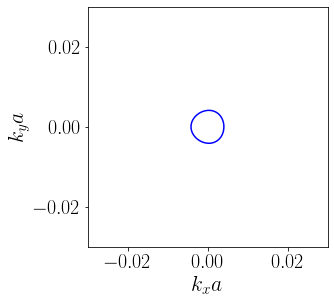

In [100]:
ml.rcParams['contour.negative_linestyle']= 'solid'
ind = np.where(np.abs(Dl-DlistABC)<0.01)[0][0]
ml.rcParams['figure.figsize'] = (5, 5)
fig, ax = plt.subplots(1,1)
ax.contour(KX, KY, w0[:,:,2],[fend[ind](-2.03)],colors='b')
ax.set_xlabel(r'$k_xa$',fontsize=22)
ax.set_ylabel(r'$k_ya$',fontsize=22)
ax.set(adjustable='box', aspect='equal')
ax.set_xlim([-0.03,0.03])
ax.set_ylim([-0.03,0.03])
plt.tight_layout()
#plt.savefig('FS.pdf')

In [41]:
fdt = np.array([interp1d(nuTABC[i], dosABC[i], kind='linear') for i in range(len(nuTABC))])

In [102]:
fdt[ind](-2.03)

array(0.21033727)

In [101]:
T=0.025
mu = fend[ind](-2.03)
Dosl=(4*st**2*1e4/((2*np.pi*2.46)**2*4*T))*(1/np.cosh((-w0[:,:,2]+mu)/(2*T))**2)
indl = np.where((np.abs(KX)<0.03)&(np.abs(KY)<0.03))
indl1 = np.where(((np.abs(KX)>=0.03)|(np.abs(KY)>=0.03)))
print(np.sum(Dosl[indl[0],indl[1]]))
print(np.sum(Dosl[indl1[0],indl1[1]]))
print(np.sum(Dosl[indl[0],indl[1]])+np.sum(Dosl[indl1[0],indl1[1]]))
print(np.sum(Dosl))

0.10302333802520394
0.10573305416783005
0.208756392193034
0.20875639219303402


/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
T=0.025
mu = fend[ind](-1.8)
mup = mu+dmu
f2=-(4*st**2 / (2*np.pi)**2)*np.sum(0.5*(1-np.tanh((-w0[:,:,2]+mup)/(2*T))))*1e4/2.46**2
mum = mu-dmu
f1=-(4*st**2 / (2*np.pi)**2)*np.sum(0.5*(1-np.tanh((-w0[:,:,2]+mum)/(2*T))))*1e4/2.46**2
print((f2-f1) / (2*dmu))

0.25810884858235017


/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


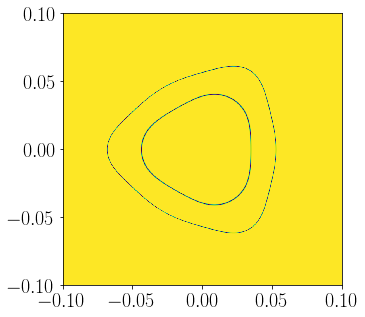

In [51]:
T=0.025
mu = fend[ind](-1.0)
plt.pcolormesh(KX, KY, -(1/4*T)*(1/np.cosh((w0[:,:,2]-mu)/(2*T))**2))

In [7]:
from scipy import optimize
def func(k,th, Dt1, mu):
    w =np.linalg.eigvalsh(getBMatrixABC(k*np.cos(th), k*np.sin(th), Dt1, 0, np.pi/2, mu, 1))
    return w[2]

def catch(func, *args, **kwargs):
    try:
        return func(*args, **kwargs)
    except RuntimeError:
        return None
    except ValueError:
        return None

In [8]:
Dl=20
ind = np.where(np.abs(Dl-DlistABC)<0.01)[0][0]
muc=fend[ind](-1.0)

In [9]:
NFS=400
thr = np.linspace(-np.pi,np.pi,NFS,endpoint=False)
kmax = 0.1
kxlro = np.array([[th, catch(optimize.newton, lambda k:func(k,th, Dl, muc), 1.2*kmax)] for th in thr])
kxlri = np.array([[th[0],catch(optimize.brentq,lambda k:func(k,th[0], Dl, muc), 0.00002, th[1]-0.00001)] for th in kxlro])

In [72]:
np.any(kxlri[:,1]==None)

False

In [10]:
kxlo=kxlro[:,1]*np.cos(kxlro[:,0])
kylo=kxlro[:,1]*np.sin(kxlro[:,0])
kxli=kxlri[:,1]*np.cos(kxlri[:,0])
kyli=kxlri[:,1]*np.sin(kxlri[:,0])
kxl = np.concatenate((kxlo, kxli))
kyl = np.concatenate((kylo, kyli))

In [11]:
w0, v0 = np.linalg.eigh(getBMatrixABC(kxl, kyl, Dl, 0.00, np.pi/2, 0.0, 1))
gxMh = np.einsum('ik, kl, il->i', np.conj(v0[:,:,2]), gx, v0[:,:,2])
gyMh = np.einsum('ik, kl, il->i', np.conj(v0[:,:,2]), gy, v0[:,:,2])

vxh = np.einsum('ik, kl, il->i', np.conj(v0[:,:,2]), vx, v0[:,:,2])
vyh = np.einsum('ik, kl, il->i', np.conj(v0[:,:,2]), vy, v0[:,:,2])

In [12]:
Sz = np.diag([1,1,0,0,-1,-1])
SzM = np.einsum('ik, kl, il->i', np.conj(v0[:,:,2]), Sz, v0[:,:,2])
S0 = np.diag([1,1,0,0,1,1])
S0M = np.einsum('ik, kl, il->i', np.conj(v0[:,:,2]), S0, v0[:,:,2])
SzM = SzM / S0M

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


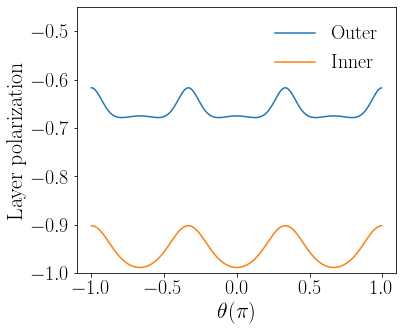

In [55]:
ml.rcParams['contour.negative_linestyle']= 'solid'
ml.rcParams['figure.figsize'] = (6, 5)
fig, ax = plt.subplots(1,1)
ax.plot(thr/np.pi, SzM[:NFS],label="Outer")
ax.plot(thr/np.pi, SzM[NFS:],label="Inner")
ax.set_xlabel(r'$\theta(\pi)$',fontsize=22)
ax.set_ylabel('Layer polarization',fontsize=22)
ax.set_ylim([-1,-0.45])
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('LayerPol.pdf')

In [13]:
gp = gxMh+gyMh*1j
gm = gxMh-gyMh*1j
vp = vxh+vyh*1j
vm = vxh-vyh*1j

In [14]:
def ql(n,qp,thr):
    return (1/len(thr))*np.sum(np.exp(-(3*n+1)*thr*1j)*qp)

In [77]:
ql(6,vp[:NFS],thr)

(-0.12515200927935383+1.1368683772161604e-14j)

In [15]:
nl = np.arange(-5,6,1)
gno=np.array(list(map(lambda n: ql(n,gp[:NFS],thr), nl)))
vno=np.array(list(map(lambda n: ql(n,vp[:NFS],thr), nl)))
gni=np.array(list(map(lambda n: ql(n,gp[NFS:],thr), nl)))
vni=np.array(list(map(lambda n: ql(n,vp[NFS:],thr), nl)))
gn = np.concatenate((gno,gni))
vn = np.concatenate((vno,vni))

In [119]:
vno

array([-3.26729889e-01-3.86535248e-14j,  1.35771427e+00-6.82121026e-14j,
       -5.15552745e+00+0.00000000e+00j,  1.84249826e+01-9.09494702e-15j,
       -1.29596086e+02-5.45696821e-14j, -5.36947414e+02+2.50111043e-14j,
        1.22568328e+01+5.45696821e-14j, -2.79097600e+01-9.09494702e-15j,
        8.29367556e+00+4.09272616e-14j, -2.23054531e+00+8.18545232e-14j,
        5.53234484e-01+2.27373675e-14j])

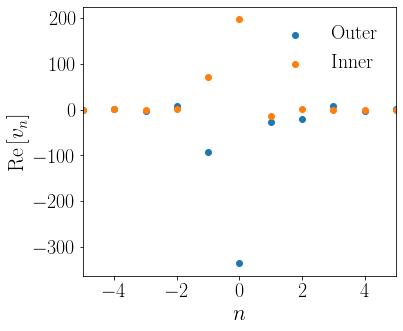

In [37]:
ml.rcParams['contour.negative_linestyle']= 'solid'
ml.rcParams['figure.figsize'] = (6, 5)
fig, ax = plt.subplots(1,1)
ax.scatter(nl,np.real(vno),label="Outer")
ax.scatter(nl,np.real(vni),label="Inner")
ax.set_xlabel(r'$n$',fontsize=22)
ax.set_ylabel(r'$\mathrm{Re}\left[v_n\right]$',fontsize=22)
ax.set_xlim([-5,5])
plt.legend(frameon=False)
plt.tight_layout()
#plt.savefig('vn.pdf')

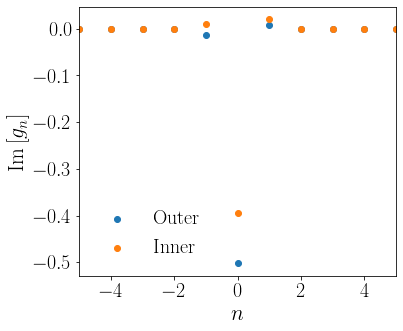

In [36]:
ml.rcParams['contour.negative_linestyle']= 'solid'
ml.rcParams['figure.figsize'] = (6, 5)
fig, ax = plt.subplots(1,1)
ax.scatter(nl,np.imag(gno),label="Outer")
ax.scatter(nl,np.imag(gni),label="Inner")
ax.set_xlabel(r'$n$',fontsize=22)
ax.set_ylabel(r'$\mathrm{Im}\left[g_n\right]$',fontsize=22)
ax.set_xlim([-5,5])
plt.legend(frameon=False)
plt.tight_layout()
#plt.savefig('gn.pdf')

In [18]:
kr, st = np.linspace(-0.1,0.1, 1500,retstep=True)
KX, KY = np.meshgrid(kr, kr)
T=0.025
multd = (4*st**2*1e4/((2*np.pi*2.46)**2*4*T))
singleFS=False
w0, v0 = np.linalg.eigh(getBMatrixABC(KX, KY, Dl, 0, 0, 0.00, 1))
Dosl=multd*(1/np.cosh((-w0[:,:,2]+muc)/(2*T))**2)
ko = np.min(kxlro[:,1])
ki = np.max(kxlri[:,1])
indli = np.where(np.sqrt(KX**2+KY**2)<0.5*(ki+ko))
indlo = np.where(np.sqrt(KX**2+KY**2)>=0.5*(ki+ko))
dosi = np.sum(Dosl[indli[0],indli[1]])
doso = np.sum(Dosl[indlo[0],indlo[1]])

/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in cosh
  import sys
/home/aghazary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys


In [21]:
doso+dosi

0.3600821342357559

In [22]:
fdt = np.array([interp1d(nuTABC[i], dosABC[i], kind='linear') for i in range(len(nuTABC))])

In [23]:
fdt[ind](-1.0)

array(0.36043056)

In [33]:
def Free(qx, qy, Bx, By, gn, vn,singleFS):
    qp = qx+qy*1j
    Bp = Bx+By*1j
    if singleFS:
        Ipp = np.sum((np.conj(qp)*vn+2*np.conj(Bp)*gn)*(qp*np.conj(vn)+2*Bp*np.conj(gn)))
        Ipm = np.sum((qp*np.conj(vn)+2*Bp*np.conj(gn))*(qp*np.flip(np.conj(vn))+2*Bp*np.flip(np.conj(gn))))
        Imp = np.sum((np.conj(qp)*vn+2*np.conj(Bp)*gn)*(np.conj(qp)*np.flip(vn)+2*np.conj(Bp)*np.flip(gn)))
    else:
        NFS = vn.shape[0]//2
        Ipp = ((doso/(dosi+doso))*np.sum((np.conj(qp)*vn[:NFS]+2*np.conj(Bp)*gn[:NFS])*
                                         (qp*np.conj(vn[:NFS])+2*Bp*np.conj(gn[:NFS])))+
               (dosi/(dosi+doso))*np.sum((np.conj(qp)*vn[NFS:]+2*np.conj(Bp)*gn[NFS:])*
                                         (qp*np.conj(vn[NFS:])+2*Bp*np.conj(gn[NFS:]))))
        Ipm = ((doso/(dosi+doso))*np.sum((qp*np.conj(vn[:NFS])+2*Bp*np.conj(gn[:NFS]))*
                                         (qp*np.flip(np.conj(vn[:NFS]))+2*Bp*np.flip(np.conj(gn[:NFS]))))+
               (dosi/(dosi+doso))*np.sum((qp*np.conj(vn[NFS:])+2*Bp*np.conj(gn[NFS:]))*
                                         (qp*np.flip(np.conj(vn[NFS:]))+2*Bp*np.flip(np.conj(gn[NFS:])))))
        Imp = ((doso/(dosi+doso))*np.sum((np.conj(qp)*vn[:NFS]+2*np.conj(Bp)*gn[:NFS])*
                                         (np.conj(qp)*np.flip(vn[:NFS])+2*np.conj(Bp)*np.flip(gn[:NFS])))+
               (dosi/(dosi+doso))*np.sum((np.conj(qp)*vn[NFS:]+2*np.conj(Bp)*gn[NFS:])*
                                         (np.conj(qp)*np.flip(vn[NFS:])+2*np.conj(Bp)*np.flip(gn[NFS:]))))
    return np.array([2*np.real(Ipp),np.real(2*Ipp - np.sqrt(Ipm*Imp))])

In [25]:
Free(0.01,0,0.6,0.1,gn,vn)

array([17.81042155, 10.01735783])

In [32]:
gni.shape

(11,)

(0.0, 400.0)

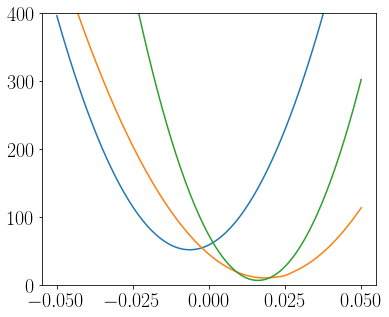

In [38]:
qx = np.linspace(-0.05,0.05,200)
plt.plot(qx, np.array([Free(qxl,-qxl,6.0,6.0,gn,vn,False)[1] for qxl in qx]))
plt.plot(qx, np.array([Free(qxl,-qxl,6.0,6.0,gni,vni,True)[1] for qxl in qx]))
plt.plot(qx, np.array([Free(qxl,-qxl,6.0,6.0,gno,-vno,True)[1] for qxl in qx]))
plt.ylim([0,400])

In [46]:
singleFS=False

In [51]:
vn = np.concatenate((vno,vni))

In [52]:
from itertools import starmap
qx = np.linspace(-0.03,0.03,600)
QX, QY=np.meshgrid(qx,qx)
QS = np.reshape(np.moveaxis(np.array([QX,QY]),0,-1), (-1,2))

def getMin(Bx, By):
    RS = np.array(list(starmap(lambda x, y: Free(x,y,Bx,By,gn,vn,singleFS), QS)))
    indmins = np.argmin(RS[:,0])
    indminp = np.argmin(RS[:,1])
    return np.array([QS[indmins][0], QS[indmins][1], RS[indmins,0], QS[indminp][0], QS[indminp][1], RS[indminp,1]])

def getMinL(B):
    return getMin(B,B)

In [42]:
Z3 = 1.20206
mult = 7*Z3/(16*4*np.pi**2)

In [53]:
from multiprocessing import Pool
pool = Pool(processes=4)
Bl = np.linspace(0,6.0,10)

Min = np.array(pool.map(getMinL, Bl))
Minq0 = np.array(list(map(lambda x: Free(0,0,x,x,gno,vno,singleFS), Bl)))

In [56]:
Minq0 = np.array(list(map(lambda x: Free(0,0,x,x,gn,vn,singleFS), Bl)))

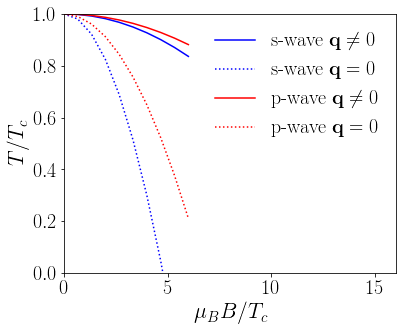

In [57]:
ml.rc('font', family='serif',size=20)
plt.plot(Bl, 1-mult*Min[:,2],'b-', label=r's-wave $\mathbf{q}\neq0$')
plt.plot(Bl, 1-mult*Minq0[:,0],'b:',label=r's-wave $\mathbf{q}=0$')
plt.plot(Bl, 1-mult*Min[:,5],'r-',label=r'p-wave $\mathbf{q}\neq0$')
plt.plot(Bl, 1-mult*Minq0[:,1],'r:',label=r'p-wave $\mathbf{q}=0$')
plt.ylim([0.0,1.0001])
plt.ylabel(r'$T/T_c$',fontsize=22)
plt.xlabel(r'$\mu_B B/T_c$',fontsize=22)
plt.xlim([0,16])
plt.legend(frameon=False)
plt.tight_layout()
#plt.savefig('TBDep.pdf')

In [34]:
Min.shape

(10, 6)

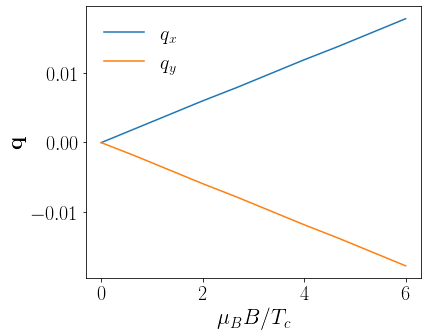

In [59]:
plt.plot(Bl, Min[:,0],label='$q_x$')
plt.plot(Bl, Min[:,1],label='$q_y$')
plt.ylabel(r'$\mathbf{q}$',fontsize=22)
plt.xlabel(r'$\mu_B B/T_c$',fontsize=22)
plt.legend(frameon=False)

In [45]:
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Min[:,5], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Min[:,2], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Minq0[:,1], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Minq0[:,0], 2)[-1])

0.0025407459443858647
0.003786298331220688
0.026984362329646495
0.053860160997882524


In [49]:
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Min[:,5], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Min[:,2], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Minq0[:,1], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Minq0[:,0], 2)[-1])

0.019236598547037277
0.03808180189014641
0.026655994271488705
0.026657168936770975


In [58]:
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Min[:,5], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Min[:,2], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Minq0[:,1], 2)[-1])
print(-np.polynomial.polynomial.polyfit(Bl, 1-mult*Minq0[:,0], 2)[-1])

0.003286328978156033
0.0045521636370329955
0.021914571936207574
0.04376068969067895


In [4]:
dpath = "/home/aghazary/Documents/MyWorks/BilayerGraphene/PythonCode/Orbital/"
with open(dpath+'TcDepDB0Th0.npy', 'rb') as f:
    TcB0 = np.load(f)
with open(dpath+'TcDepDBTh0.npy', 'rb') as f:
    TcB = np.load(f)
with open(dpath+'TcDepDBTh0T.npy', 'rb') as f:
    TcBT = np.load(f)

In [54]:
Bl = np.linspace(0,16.0,100)

In [110]:
TcB[-1,39]

array([ 7.80000000e+01,  6.00000000e+00, -3.33889816e-05,  5.97662771e-03,
       -1.40730464e+01, -3.33889816e-05,  3.37228715e-03, -6.61295978e+00])

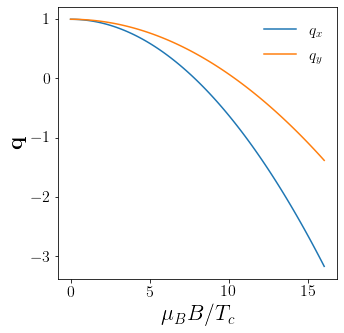

In [55]:
plt.plot(Bl, TcB[:,2],label='$q_x$')
plt.plot(Bl, TcB[:,5],label='$q_y$')
plt.ylabel(r'$\mathbf{q}$',fontsize=22)
plt.xlabel(r'$\mu_B B/T_c$',fontsize=22)
plt.legend(frameon=False)

In [127]:
dpath = "/home/aghazary/Documents/MyWorks/BilayerGraphene/PythonCode/Orbital/"
Tl = np.linspace(0,2*np.pi,200)
with open(dpath+'TcDepThB6.npy', 'rb') as f:
    TcB = np.load(f)

In [58]:
AngS = np.array([np.arctan2(TcBl[1],TcBl[0]) if np.arctan2(TcBl[1],TcBl[0])>0 else np.arctan2(TcBl[1],TcBl[0])+2*np.pi for TcBl in TcB])
AngP = np.array([np.arctan2(TcBl[4],TcBl[3]) if np.arctan2(TcBl[4],TcBl[3])>0 else np.arctan2(TcBl[4],TcBl[3])+2*np.pi for TcBl in TcB])

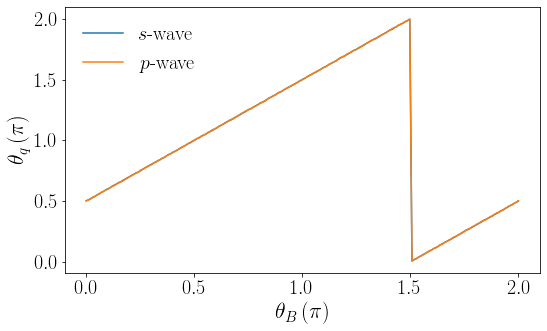

In [62]:
ml.rcParams['figure.figsize'] = (8, 5)
ml.rc('font', family='serif',size=20)
plt.plot(Tl/np.pi, AngS/np.pi,label='$s$-wave')
plt.plot(Tl/np.pi, AngP/np.pi,label='$p$-wave')
plt.ylabel(r'$\theta_q \left(\pi\right)$',fontsize=22)
plt.xlabel(r'$\theta_B \left(\pi\right)$',fontsize=22)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('OrbitalFieldAngleDep.pdf')

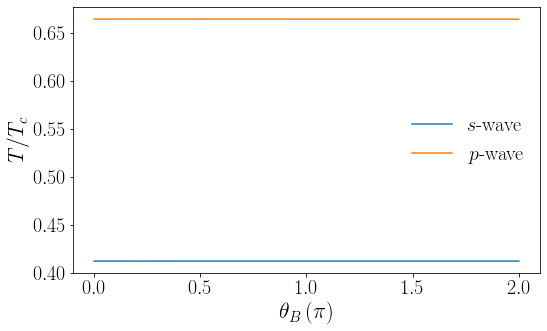

In [64]:
ml.rcParams['figure.figsize'] = (8, 5)
ml.rc('font', family='serif',size=20)
plt.plot(Tl/np.pi, TcB[:,2],label='$s$-wave')
plt.plot(Tl/np.pi, TcB[:,5],label='$p$-wave')
plt.ylabel(r'$T/T_c$',fontsize=22)
plt.xlabel(r'$\theta_B \left(\pi\right)$',fontsize=22)
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('TTcAngleDep.pdf')

In [114]:
Dl = np.linspace(0,80,41)
Bl = np.linspace(0,6.0,11)

In [115]:
ls = np.reshape(np.moveaxis(np.array(np.meshgrid(Dl,Bl)),[0],[-1]),(-1,2))

In [132]:
TcB=np.concatenate((ls,TcB),axis=1)

In [121]:
lsl = np.moveaxis(np.array(np.meshgrid(Dl,Bl)),[0],[-1])

In [134]:
np.reshape(TcB, (lsl.shape[0],lsl.shape[1],-1)).shape

(11, 3, 8)

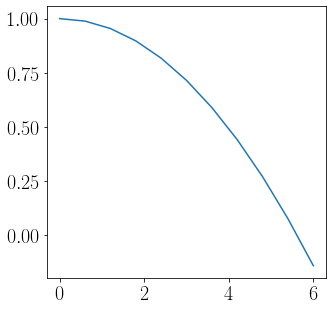

In [146]:
plt.plot(TcB[:,10,1],TcB[:,10,2])

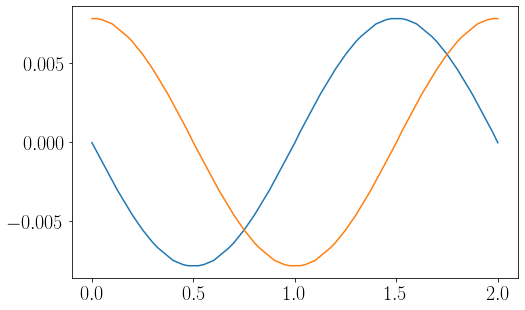

In [123]:
plt.plot(TcB[-1,:,0]/np.pi,TcB[-1,:,2])
plt.plot(TcB[-1,:,0]/np.pi,TcB[-1,:,3])

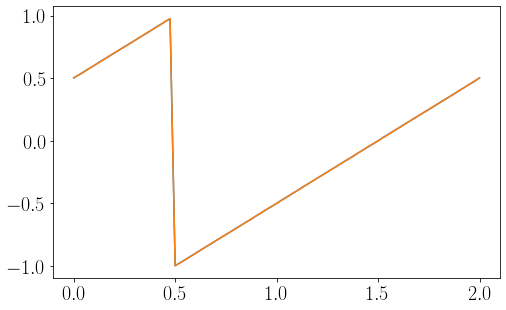

In [122]:
plt.plot(TcB[-1,:,0]/np.pi,np.arctan2(TcB[-1,:,3],TcB[-1,:,2])/np.pi)
plt.plot(TcB[-1,:,0]/np.pi,np.arctan2(TcB[-1,:,6],TcB[-1,:,5])/np.pi)

In [57]:
dpath = "/home/aghazary/Documents/MyWorks/BilayerGraphene/PythonCode/Orbital/"
with open(dpath+'TcDepThB0nm1Dl20.npy', 'rb') as f:
    TcB0 = np.load(f)
with open(dpath+'TcDepThBnm1Dl20.npy', 'rb') as f:
    TcB = np.load(f)

In [58]:
alps = np.array([[TcB[0,i,0],-np.polynomial.polynomial.polyfit(TcB[:,i,1], TcB[:,i,4], 2)[-1]] for i in range(TcB.shape[1])])
alpp = np.array([[TcB[0,i,0],-np.polynomial.polynomial.polyfit(TcB[:,i,1], TcB[:,i,7], 2)[-1]] for i in range(TcB.shape[1])])
alps0 = np.array([[TcB0[0,i,0],-np.polynomial.polynomial.polyfit(TcB0[:,i,1], TcB0[:,i,2], 2)[-1]] for i in range(TcB0.shape[1])])
alpp0 = np.array([[TcB0[0,i,0],-np.polynomial.polynomial.polyfit(TcB0[:,i,1], TcB0[:,i,3], 2)[-1]] for i in range(TcB0.shape[1])])

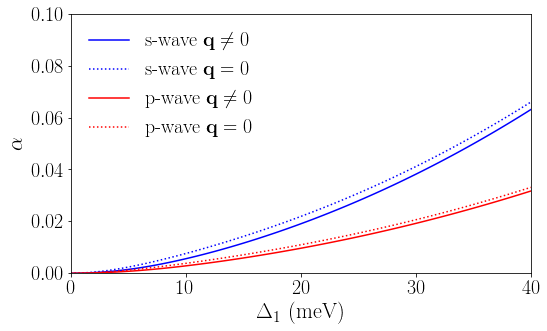

In [19]:
ml.rcParams['figure.figsize'] = (8, 5)
ml.rc('font', family='serif',size=20)
plt.plot(alps[:,0],alps[:,1],'b-', label=r's-wave $\mathbf{q}\neq0$')
plt.plot(alps0[:,0],alps0[:,1],'b:',label=r's-wave $\mathbf{q}=0$')
plt.plot(alpp[:,0],alpp[:,1],'r-',label=r'p-wave $\mathbf{q}\neq0$')
plt.plot(alpp0[:,0],alpp0[:,1],'r:',label=r'p-wave $\mathbf{q}=0$')

plt.ylim([0.0,0.1])
plt.ylabel(r'$\alpha$',fontsize=22)
plt.xlabel(r'$\Delta_1\,\left(\mathrm{meV}\right)$',fontsize=22)
plt.xlim([0,40])
plt.legend(frameon=False)
plt.tight_layout()

plt.savefig('AlDepDeltanm1.pdf')
#plt.xlim([0,20])

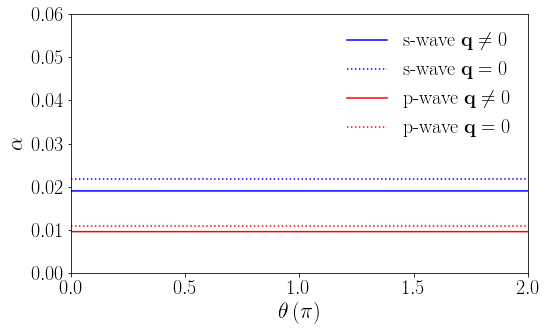

In [60]:
ml.rcParams['figure.figsize'] = (8, 5)
ml.rc('font', family='serif',size=20)
plt.plot(alps[:,0]/np.pi,alps[:,1],'b-', label=r's-wave $\mathbf{q}\neq0$')
plt.plot(alps0[:,0]/np.pi,alps0[:,1],'b:',label=r's-wave $\mathbf{q}=0$')
plt.plot(alpp[:,0]/np.pi,alpp[:,1],'r-',label=r'p-wave $\mathbf{q}\neq0$')
plt.plot(alpp0[:,0]/np.pi,alpp0[:,1],'r:',label=r'p-wave $\mathbf{q}=0$')

plt.ylim([0.0,0.06])
plt.ylabel(r'$\alpha$',fontsize=22)
plt.xlabel(r'$\theta\left(\pi\right)$',fontsize=22)
plt.xlim([0,2])
plt.legend(frameon=False)
plt.tight_layout()

plt.savefig('AlDepThnm1.pdf')
#plt.xlim([0,20])

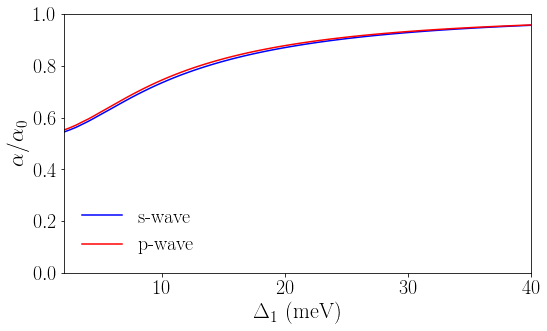

In [18]:
ml.rcParams['figure.figsize'] = (8, 5)
ml.rc('font', family='serif',size=20)
plt.plot(alps[:,0],alps[:,1]/alps0[:,1],'b-', label=r's-wave')
#plt.plot(alps0[:,0],alps0[:,1],'b:',label=r's-wave $\mathbf{q}=0$')
plt.plot(alpp[:,0],alpp[:,1]/alpp0[:,1],'r-',label=r'p-wave')
#plt.plot(alpp0[:,0],alpp0[:,1],'r:',label=r'p-wave $\mathbf{q}=0$')

plt.ylim([0.0,1.0])
plt.ylabel(r'$\alpha/\alpha_0$',fontsize=22)
plt.xlabel(r'$\Delta_1\,\left(\mathrm{meV}\right)$',fontsize=22)
plt.xlim([2,40])
plt.legend(frameon=False)
plt.tight_layout()

plt.savefig('AlAl0DepDeltanm1.pdf')
#plt.xlim([0,20])

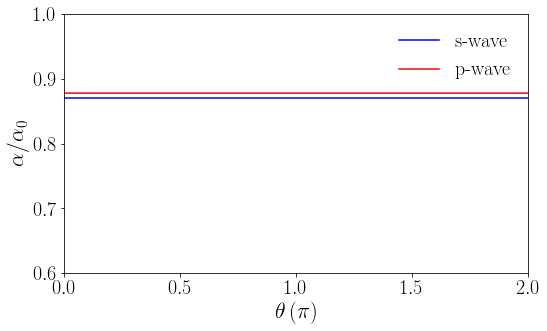

In [64]:
ml.rcParams['figure.figsize'] = (8, 5)
ml.rc('font', family='serif',size=20)
plt.plot(alps[:,0]/np.pi,alps[:,1]/alps0[:,1],'b-', label=r's-wave')
#plt.plot(alps0[:,0],alps0[:,1],'b:',label=r's-wave $\mathbf{q}=0$')
plt.plot(alpp[:,0]/np.pi,alpp[:,1]/alpp0[:,1],'r-',label=r'p-wave')
#plt.plot(alpp0[:,0],alpp0[:,1],'r:',label=r'p-wave $\mathbf{q}=0$')

plt.ylim([0.6,1.0])
plt.ylabel(r'$\alpha/\alpha_0$',fontsize=22)
plt.xlabel(r'$\theta\left(\pi\right)$',fontsize=22)
plt.xlim([0,2])
plt.legend(frameon=False)
plt.tight_layout()

plt.savefig('AlAl0DepThnm1.pdf')
#plt.xlim([0,20])

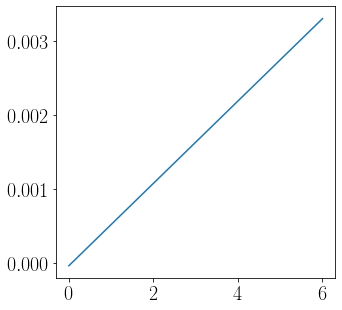

In [176]:
plt.plot(TcB[:,40,1],TcB[:,40,6])

In [111]:
Dl = np.linspace(0,40,5)
Bl = np.linspace(0,6.0,11)
ls = np.moveaxis(np.array(np.meshgrid(Dl,Bl)),[0],[-1])
lsl = np.reshape(ls, (-1,2))

In [115]:
TcB.shape

(11, 41, 8)

In [117]:
ls.shape

(11, 5, 2)

In [125]:
np.concatenate((ls, np.moveaxis(TcBT,[0,1],[1,0])), axis=2).shape

(11, 5, 8)

In [123]:
TcBT.T.shape

(6, 11, 5)